In [109]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [110]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [111]:
df.shape

(144867, 24)

In [112]:
df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'segment_factor', 'factor'], inplace=True)

In [113]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [114]:
for i in df.columns:
    print(f'Empty values in {i} : {df[i].isna().sum()/len(df[i]) * 100:.2f}%')

Empty values in data : 0.00%
Empty values in trip_creation_time : 0.00%
Empty values in route_schedule_uuid : 0.00%
Empty values in route_type : 0.00%
Empty values in trip_uuid : 0.00%
Empty values in source_center : 0.00%
Empty values in source_name : 0.20%
Empty values in destination_center : 0.00%
Empty values in destination_name : 0.18%
Empty values in od_start_time : 0.00%
Empty values in od_end_time : 0.00%
Empty values in start_scan_to_end_scan : 0.00%
Empty values in actual_distance_to_destination : 0.00%
Empty values in actual_time : 0.00%
Empty values in osrm_time : 0.00%
Empty values in osrm_distance : 0.00%
Empty values in segment_actual_time : 0.00%
Empty values in segment_osrm_time : 0.00%
Empty values in segment_osrm_distance : 0.00%


In [115]:
cat_missing = ['source_name', 'destination_name']
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [116]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [118]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [119]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
dtype: object

In [120]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
# df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [121]:
df['segment_key'] = df['trip_uuid'] + '-' + df['source_center'] + '-' + df['destination_center']
df['segment_key']

0         trip-153741093647649320-IND388121AAA-IND388620AAB
1         trip-153741093647649320-IND388121AAA-IND388620AAB
2         trip-153741093647649320-IND388121AAA-IND388620AAB
3         trip-153741093647649320-IND388121AAA-IND388620AAB
4         trip-153741093647649320-IND388121AAA-IND388620AAB
                                ...                        
144862    trip-153746066843555182-IND131028AAB-IND000000ACB
144863    trip-153746066843555182-IND131028AAB-IND000000ACB
144864    trip-153746066843555182-IND131028AAB-IND000000ACB
144865    trip-153746066843555182-IND131028AAB-IND000000ACB
144866    trip-153746066843555182-IND131028AAB-IND000000ACB
Name: segment_key, Length: 144867, dtype: object

In [122]:
time_dg = df.copy()
time_dg[['segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']] = time_dg.groupby(by='segment_key', as_index=False)[['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']].cumsum()
time_dg.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320-IND388121AAA-IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320-IND388121AAA-IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320-IND388121AAA-IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320-IND388121AAA-IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320-IND388121AAA-IND388620AAB,67.0,44.0,49.4772


In [123]:
df[['segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']] = time_dg[['segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']]

In [124]:
create_segment_dict = {'data':'first', 
                'trip_creation_time':'first',
                'route_schedule_uuid':'first',
                'route_type':'first',
                'source_name':'first',
                'destination_name':'last',
                'od_start_time':'first',
                'od_end_time':'last',
                'start_scan_to_end_scan':'max',
                'actual_distance_to_destination':'max',
                'actual_time':'max',
                'osrm_time':'max',
                'osrm_distance':'max',
                'segment_actual_time':'first',
                'segment_osrm_time':'first',
                'segment_osrm_distance':'first',
                'trip_uuid':'first',
                'source_center':'first',  
                'destination_center':'first',
                'segment_actual_time_sum':'max', 
                'segment_osrm_distance_sum':'max', 
                'segment_osrm_time_sum':'max'
                }

In [125]:
segment_df=df.groupby('segment_key', as_index=False).agg(create_segment_dict)
segment_df.sort_values(by=['segment_key','od_end_time'], ascending=False)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_uuid,source_center,destination_center,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
26367,trip-153861118270144424-IND583201AAA-IND583119AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,...,28.0484,30.0,21.0,23.2367,trip-153861118270144424,IND583201AAA,IND583119AAA,41.0,25.0,28.0484
26366,trip-153861118270144424-IND583119AAA-IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,52.5303,45.0,17.0,23.9866,trip-153861118270144424,IND583119AAA,IND583101AAA,233.0,42.0,52.5303
26365,trip-153861115439069069-IND628801AAA-IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,16.0185,21.0,8.0,9.5186,trip-153861115439069069,IND628801AAA,IND628204AAA,29.0,14.0,16.0184
26364,trip-153861115439069069-IND628613AAA-IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,40.6080,15.0,13.0,14.7197,trip-153861115439069069,IND628613AAA,IND627005AAA,89.0,77.0,78.5869
26363,trip-153861115439069069-IND628204AAA-IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,42.5213,9.0,10.0,10.0527,trip-153861115439069069,IND628204AAA,IND627657AAA,49.0,42.0,42.1431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,trip-153671043369099517-IND000000ACB-IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,281.2109,36.0,19.0,27.2834,trip-153671043369099517,IND000000ACB,IND160002AAC,608.0,231.0,317.7408
3,trip-153671042288605164-IND572101AAA-IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,56.9116,14.0,8.0,10.3544,trip-153671042288605164,IND572101AAA,IND561203AAB,95.0,39.0,55.9899
2,trip-153671042288605164-IND561203AAB-IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,28.1994,18.0,10.0,10.8633,trip-153671042288605164,IND561203AAB,IND562101AAA,46.0,26.0,28.1995
1,trip-153671041653548748-IND462022AAA-IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,544.8027,43.0,39.0,55.2597,trip-153671041653548748,IND462022AAA,IND209304AAA,820.0,474.0,649.8528


In [126]:
create_trip_dict = {
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first','source_center':'first',
    'source_name':'first',
    'destination_center':'last',
    'destination_name':'last',
    'od_start_time':'first',
    'od_end_time':'last',
    'start_scan_to_end_scan':'sum',
    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',
    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum'
    }

In [127]:
trip_df=segment_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,743.0,991.3523,93.0,72.0,93.3217
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,32.0,18.0,21.2177
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1932.273969,3347.0,1741.0,2372.0852,96.0,46.0,57.2953
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,23.0,9.0,11.9675
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,127.0,56.0,72.0035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,22.0,18.0,19.2028
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,12.0,7.0,10.4451
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,421.0,38.684839,282.0,54.0,63.2841,90.0,33.0,43.0540
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,347.0,134.723836,264.0,184.0,177.6635,80.0,62.0,62.0534


In [128]:
df = trip_df

In [129]:
df['od_time_diff_hour'] = df['od_end_time'].dt.hour - df['od_start_time'].dt.hour
df.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,743.0,991.3523,93.0,72.0,93.3217,0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,32.0,18.0,21.2177,0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1932.273969,3347.0,1741.0,2372.0852,96.0,46.0,57.2953,0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,23.0,9.0,11.9675,1
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,127.0,56.0,72.0035,3


In [130]:
df.drop(columns=['od_end_time','od_start_time'], inplace=True)

In [131]:
df[['destination','dest_state']] = df['destination_name'].str.split('(', n=1, expand=True)
df['dest_state'] = df['dest_state'].str.rstrip(')')
df[['dest_city','dest_place','dest_code']] = df['destination'].str.split('_', n=2, expand=True)
df[['source','source_state']] = df['source_name'].str.split('(', n=1, expand=True)
df['source_state'] = df['source_state'].str.rstrip(')')
df[['source_city','source_place','source_code']] = df['source'].str.split('_', n=2, expand=True)

In [132]:
df['trip_creation_year'] =df['trip_creation_time'].dt.year
df['trip_creation_month'] =df['trip_creation_time'].dt.month_name()
df['trip_creation_day'] =df['trip_creation_time'].dt.day
df['weekday'] = df['trip_creation_time'].dt.day_name()
df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,dest_code,source,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12,Wednesday
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12,Wednesday
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,2018,September,12,Wednesday
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None,2018,September,12,Wednesday
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,D,Bellary_Dc,Karnataka,Bellary,Dc,None,2018,September,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,...,H,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H,2018,October,3,Wednesday
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,DC,FBD_Balabhgarh_DPC,Haryana,FBD,Balabhgarh,DPC,2018,October,3,Wednesday
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,...,DC,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3,Wednesday
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,...,D,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,October,3,Wednesday


In [133]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_time_diff_hour',
       'trip_creation_year', 'trip_creation_day'],
      dtype='object')

In [134]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['trip_uuid', 'data', 'route_schedule_uuid', 'route_type',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'destination', 'dest_state', 'dest_city',
       'dest_place', 'dest_code', 'source', 'source_state', 'source_city',
       'source_place', 'source_code', 'trip_creation_month', 'weekday'],
      dtype='object')

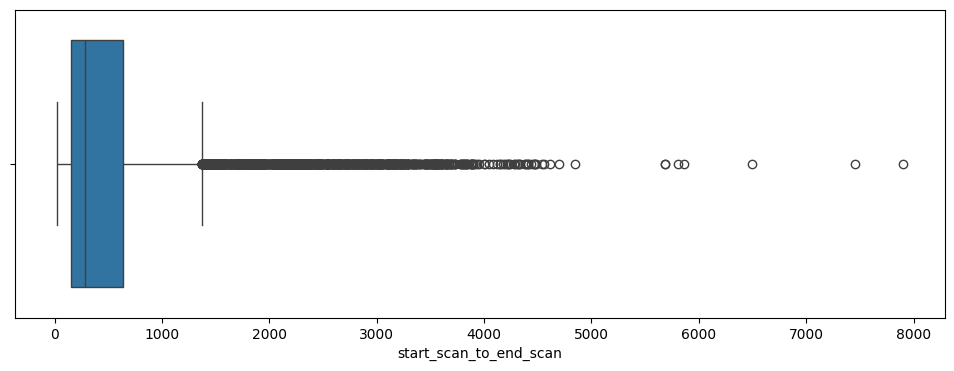

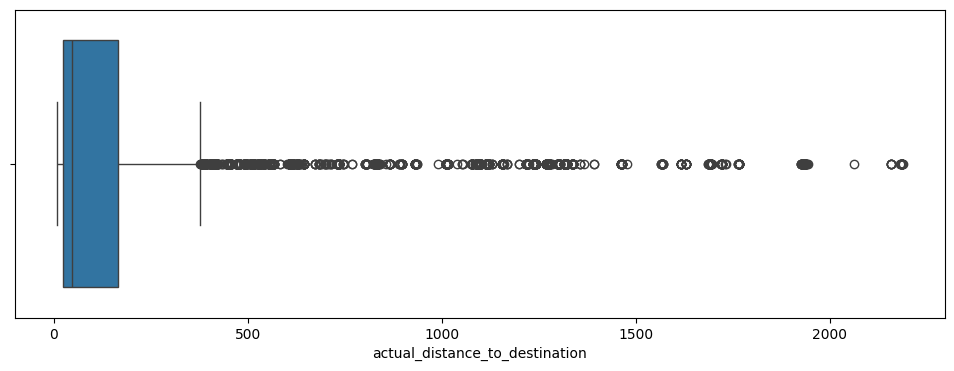

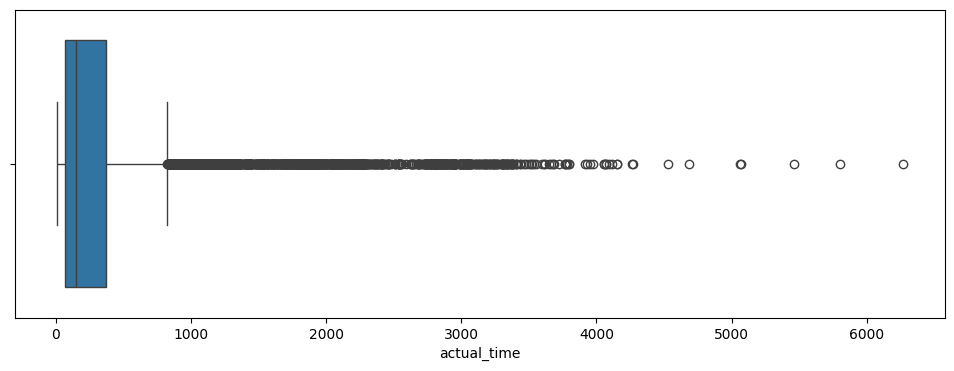

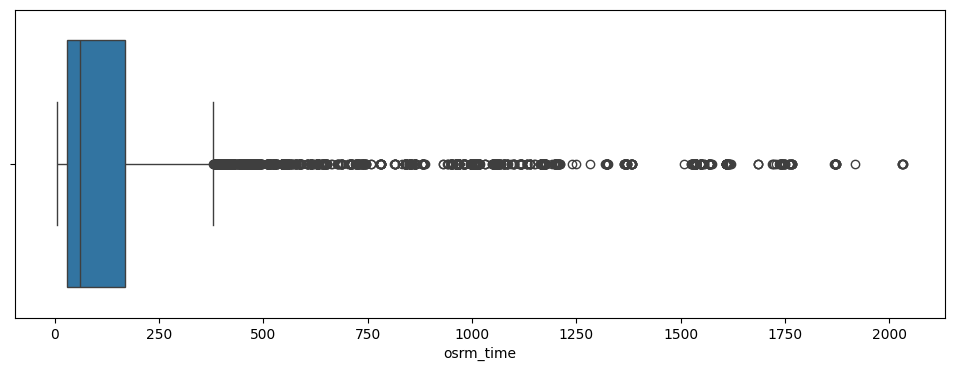

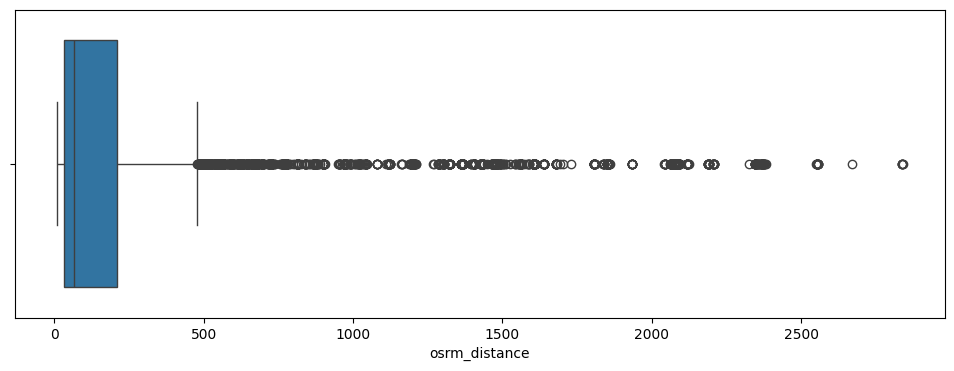

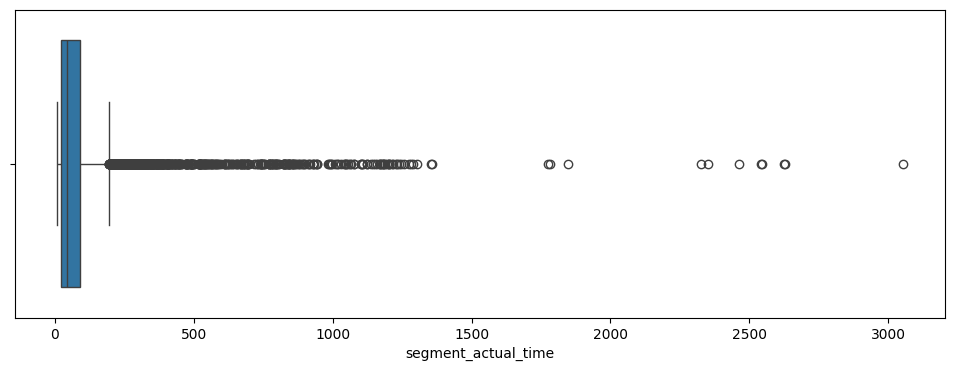

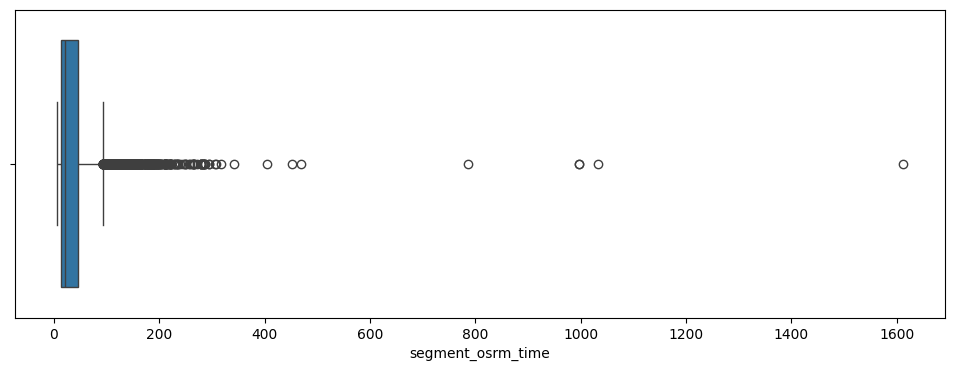

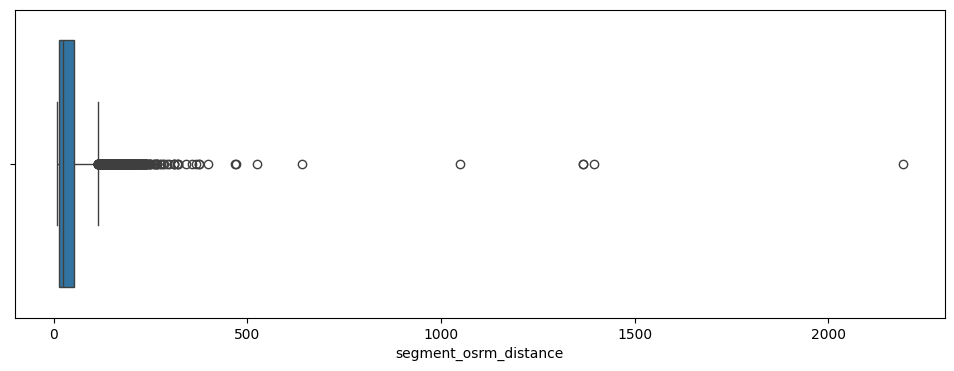

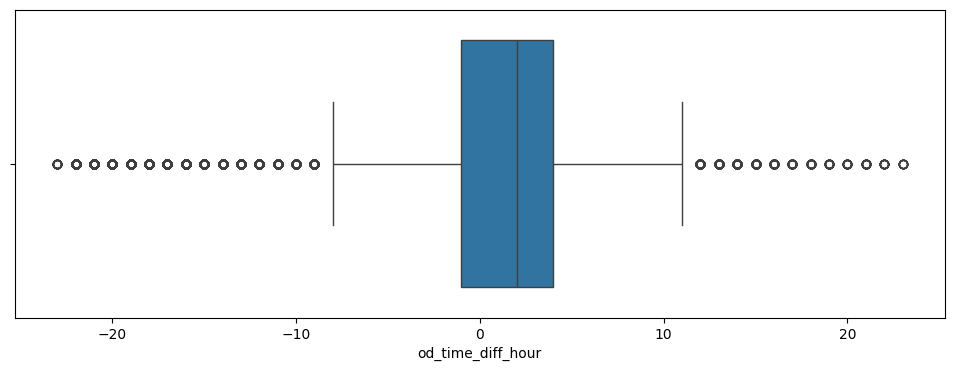

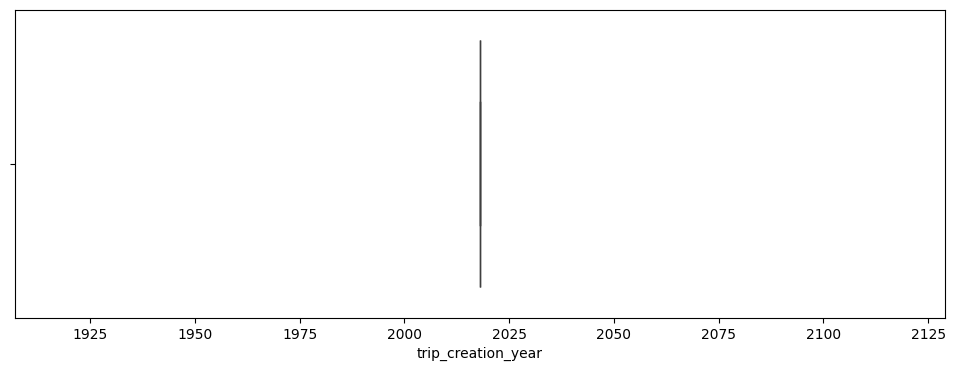

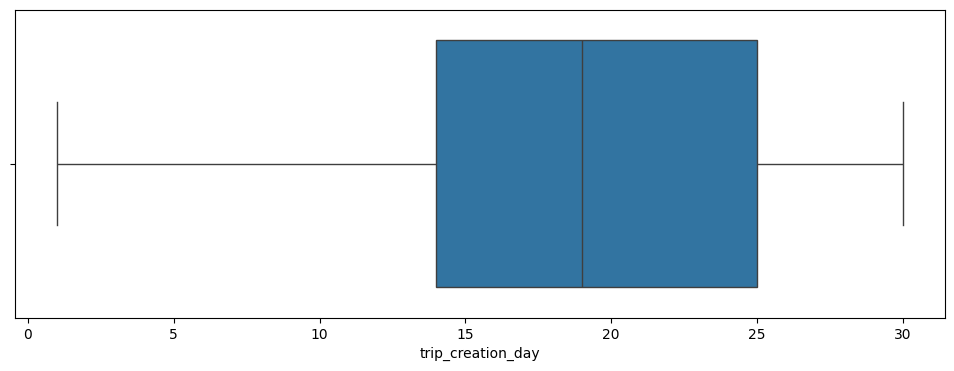

In [135]:
for i in num_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=df, x = i)
    plt.show()

In [136]:
for i in cat_cols:
    print(f'{i} -> {df[i].unique()[0:10]}')

trip_uuid -> ['trip-153671041653548748' 'trip-153671042288605164'
 'trip-153671043369099517' 'trip-153671046011330457'
 'trip-153671052974046625' 'trip-153671055416136166'
 'trip-153671066201138152' 'trip-153671066826362165'
 'trip-153671074033284934' 'trip-153671079956500691']
data -> ['training' 'test']
route_schedule_uuid -> ['thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc60074b'
 'thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0d68b9'
 'thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d'
 'thanos::sroute:f0176492-a679-4597-8332-bbd1c7f9f442'
 'thanos::sroute:d9f07b12-65e0-4f3b-bec8-df0613461b0f'
 'thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d98af4'
 'thanos::sroute:a97698cc-846e-41a7-916b-88b17412610c'
 'thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e2c513'
 'thanos::sroute:a0e60427-16ad-4b17-b3b0-6a0664355ae1'
 'thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef663dda']
route_type -> ['FTL' 'Carting']
source_center -> ['IND209304AAA' 'IND561203AAB' 'IND000000ACB' 'IND400072AAB'
 'IND5831

In [137]:
encoding_cols = ['data', 'route_type']

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[encoding_cols])

one_hot_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encoding_cols))

one_hot_df.rename(columns={'data_test':'test', 'data_training':'training', 'route_type_Carting':'carting', 'route_type_FTL':'FTL'}, inplace=True)

df = pd.concat([df, one_hot_df], axis=1)

df.drop(columns=encoding_cols, inplace=True)

df

,trip_uuid,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday,test,training,carting,FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,...,Central,H_6,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,...,ChikaDPP,D,2018,September,12,Wednesday,0.0,1.0,1.0,0.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1932.273969,3347.0,...,Bilaspur,HB,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,...,None,None,2018,September,12,Wednesday,0.0,1.0,1.0,0.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,...,Dc,None,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,...,Mehmdpur,H,2018,October,3,Wednesday,1.0,0.0,1.0,0.0
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,...,Balabhgarh,DPC,2018,October,3,Wednesday,1.0,0.0,1.0,0.0
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,38.684839,282.0,...,GovndNgr,DC,2018,October,3,Wednesday,1.0,0.0,1.0,0.0
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,134.723836,264.0,...,VdkkuSrt,I,2018,October,3,Wednesday,1.0,0.0,1.0,0.0


In [138]:
num_cols = df.select_dtypes(include="number").columns.to_list()

for col in ['trip_creation_year','trip_creation_day','test','training','carting','FTL']:
    num_cols.remove(col)

num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'od_time_diff_hour']

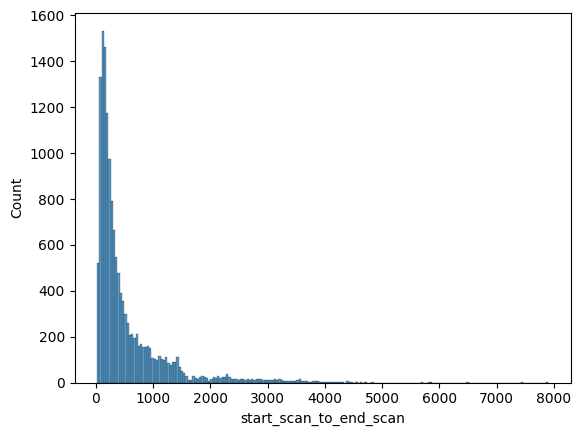

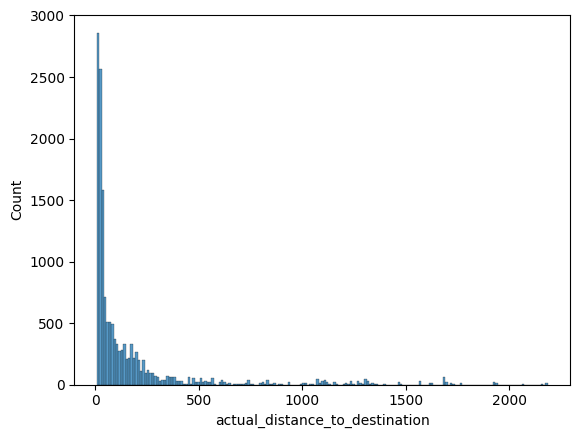

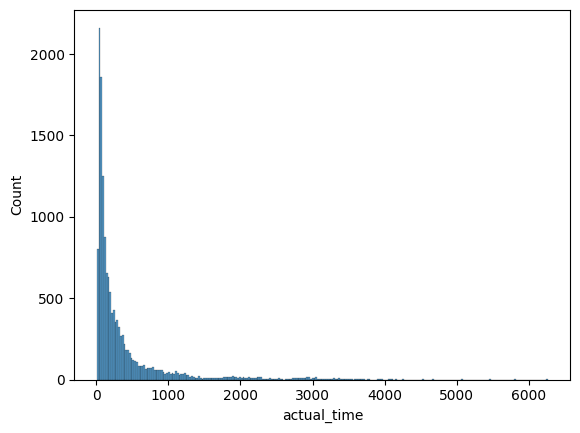

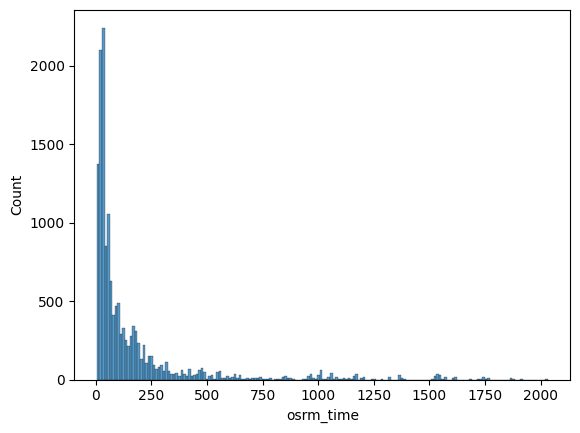

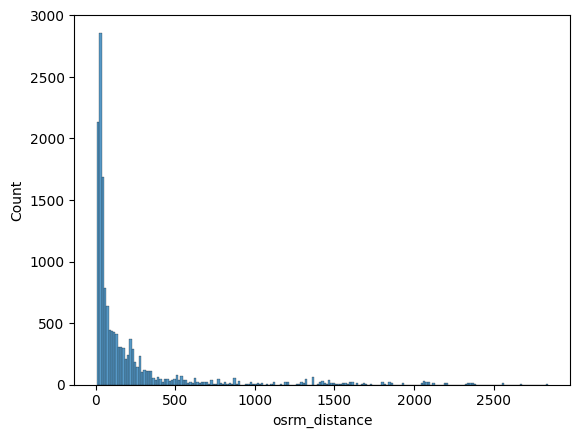

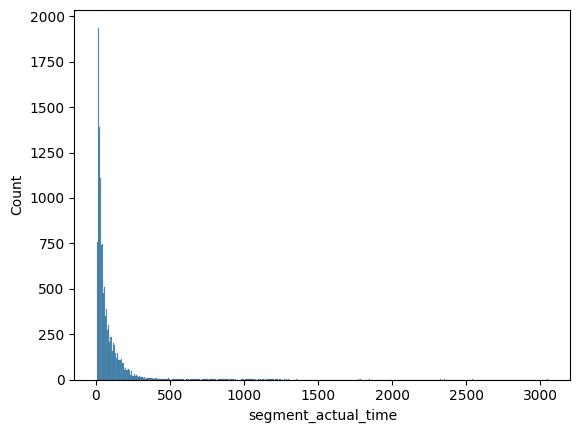

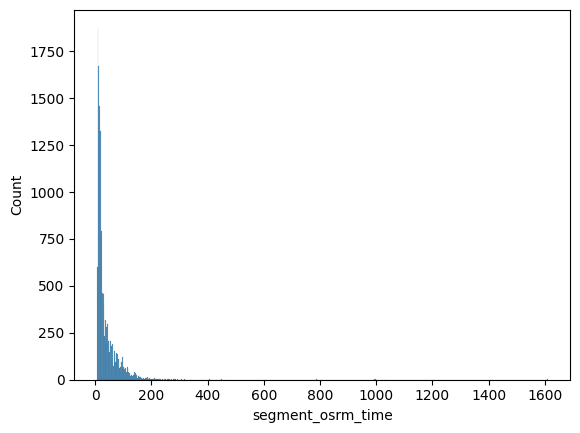

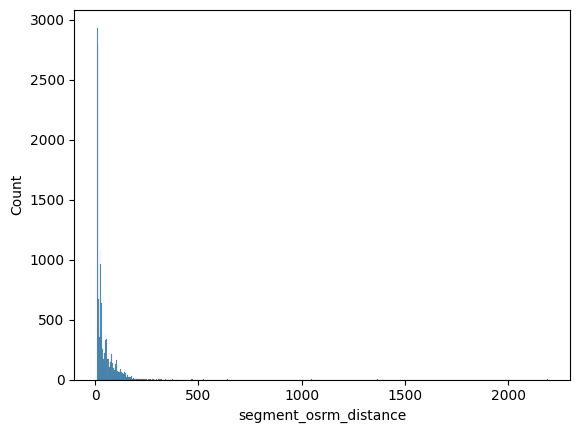

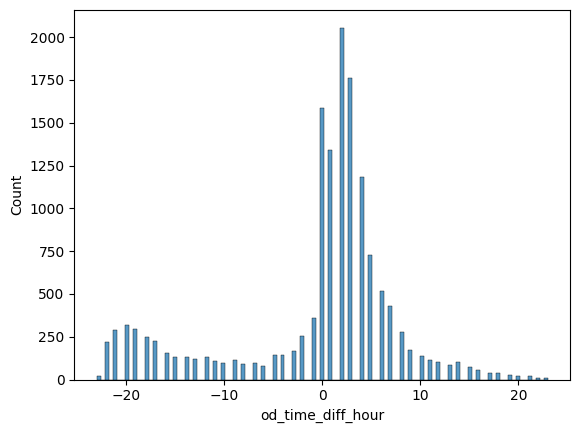

In [139]:
for col in num_cols:
    sns.histplot(data=df, x=col)
    plt.show()

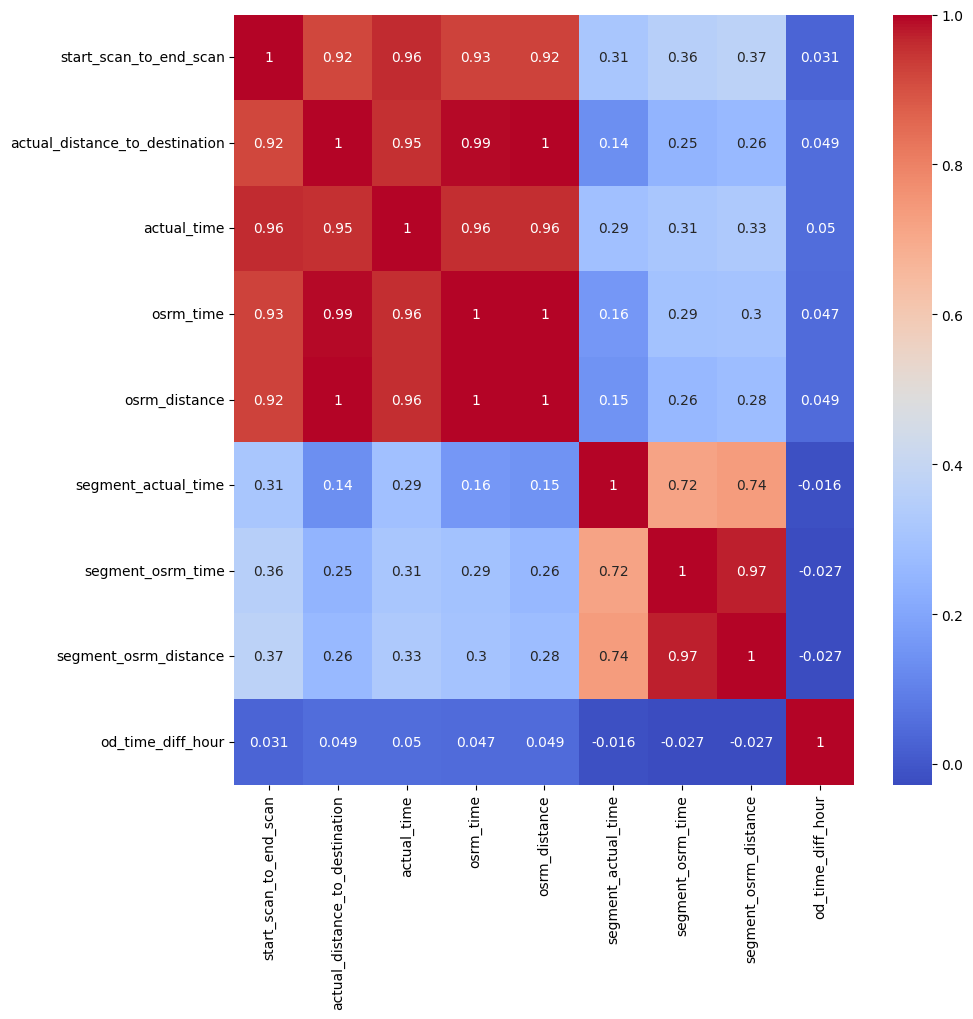

In [140]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Hypothesis Testing Between actual_time aggregated value and OSRM time aggregated value

In [141]:
np.mean(df['actual_time']), np.mean(df['osrm_time'])

(357.143753796315, 162.07120199770534)

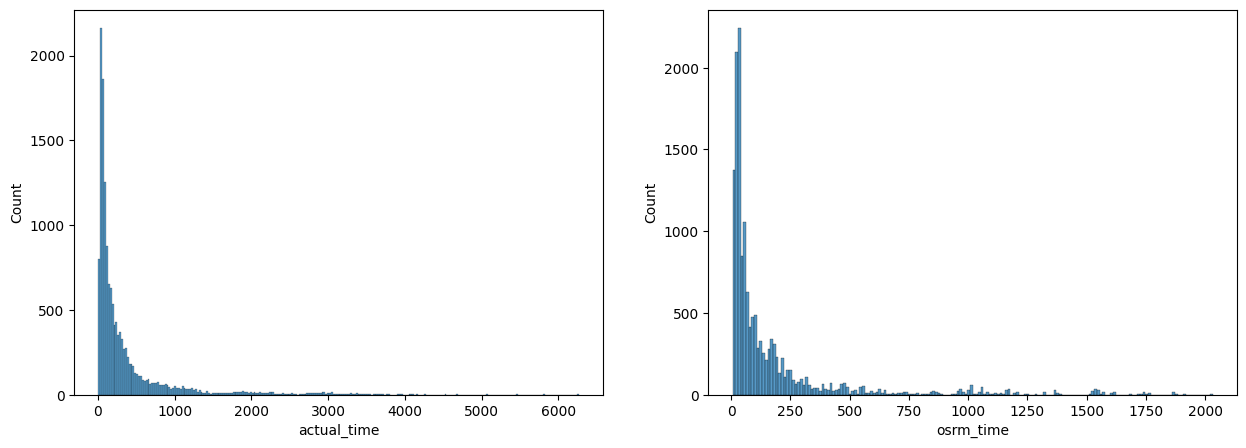

In [142]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['actual_time'])

plt.subplot(1,2,2)

sns.histplot(df['osrm_time'])
plt.show()

In [143]:
# H0 : The average osrm time is same as average actual time
# Ha : The average osrm time is greater than average actual time

alpha = 0.05

In [144]:
t_stat, p_val = stats.ttest_ind(df['actual_time'], df['osrm_time'], alternative="greater")
print(t_stat, p_val)

38.05620533303334 9.6709822137002e-310


In [145]:
if p_val < alpha:
    print("Reject the Null Hypothesis. The average osrm time is greater than average actual time.")
else:
    print("Fail to Reject the Null Hypothesis. The average actual time is same as average osrm_time.")

Reject the Null Hypothesis. The average osrm time is greater than average actual time.


## Hypothesis Testing Between actual_time aggregated value and Segment actual time aggregated value

In [146]:
np.mean(df['actual_time']), np.mean(df['segment_actual_time'])

(357.143753796315, 80.91874198555713)

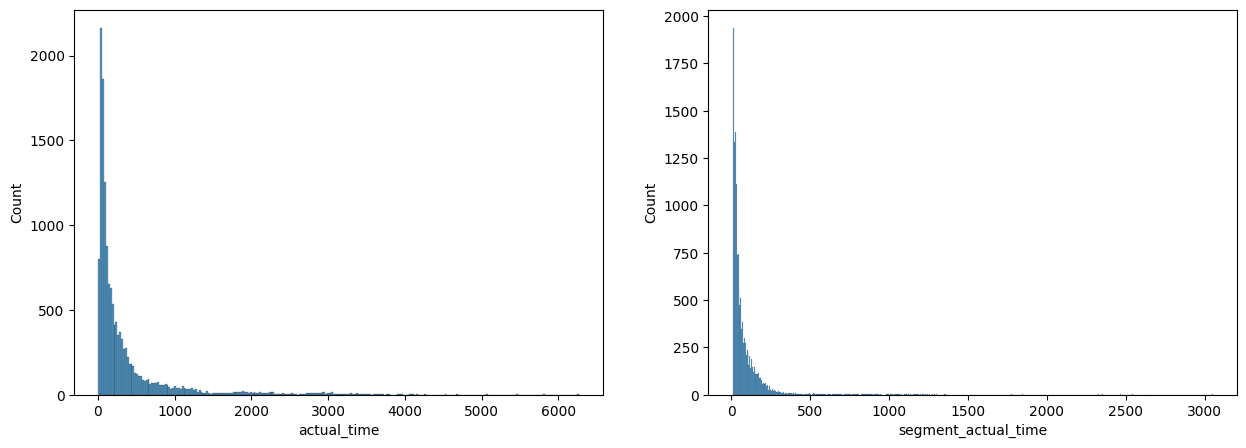

In [147]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['actual_time'])

plt.subplot(1,2,2)

sns.histplot(df['segment_actual_time'])
plt.show()

In [148]:
# H0 : The average actual time is same as average segment_actual_time
# Ha : The average actual time is greater than average segment_actual_time

alpha = 0.05

In [149]:
t_stat, p_val = stats.ttest_ind(df['actual_time'], df['segment_actual_time'], alternative="greater")
print(t_stat, p_val)

58.36778956156438 0.0


In [150]:
if p_val < alpha:
    print("Reject the Null Hypothesis. The average actual time is greater than average segment_actual_time.")
else:
    print("Fail to Reject the Null Hypothesis. The average actual time is same as average segment_actual_time.")

Reject the Null Hypothesis. The average actual time is greater than average segment_actual_time.


## Hypothesis Testing Between osrm_distance aggregated value and Segment osrm distance aggregated value

In [151]:
np.mean(df['osrm_distance']), np.mean(df['segment_osrm_distance'])

(205.1013574880205, 40.916182796787474)

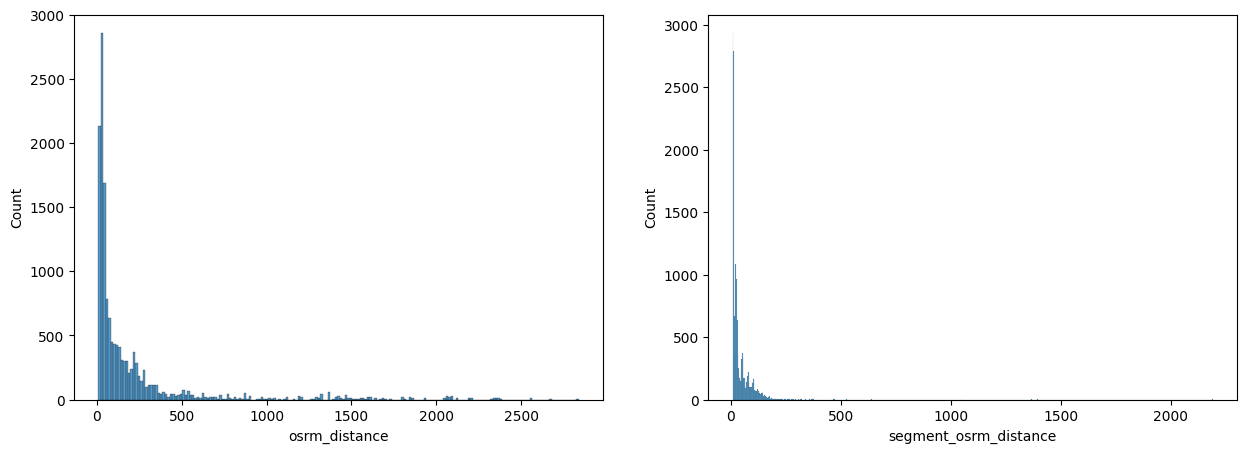

In [152]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['osrm_distance'])

plt.subplot(1,2,2)

sns.histplot(df['segment_osrm_distance'])
plt.show()

In [153]:
# H0 : The average osrm distance is same as average segment osrm distance
# Ha : The average osrm distance is greater than average segment osrm distance

alpha = 0.05

In [154]:
t_stat, p_val = stats.ttest_ind(df['osrm_distance'], df['segment_osrm_distance'], alternative="greater")
print(t_stat, p_val)

53.42704414263612 0.0


In [155]:
if p_val < alpha:
    print("Reject the Null Hypothesis. The average osrm distance is greater than average segment osrm distance.")
else:
    print("Fail to Reject the Null Hypothesis. The average osrm distance is same as average segment osrm distance.")

Reject the Null Hypothesis. The average osrm distance is greater than average segment osrm distance.


## Hypothesis Testing Between osrm_time aggregated value and Segment segment_osrm_time aggregated value

In [156]:
np.mean(df['osrm_time']), np.mean(df['segment_osrm_time'])

(162.07120199770534, 36.391104812040226)

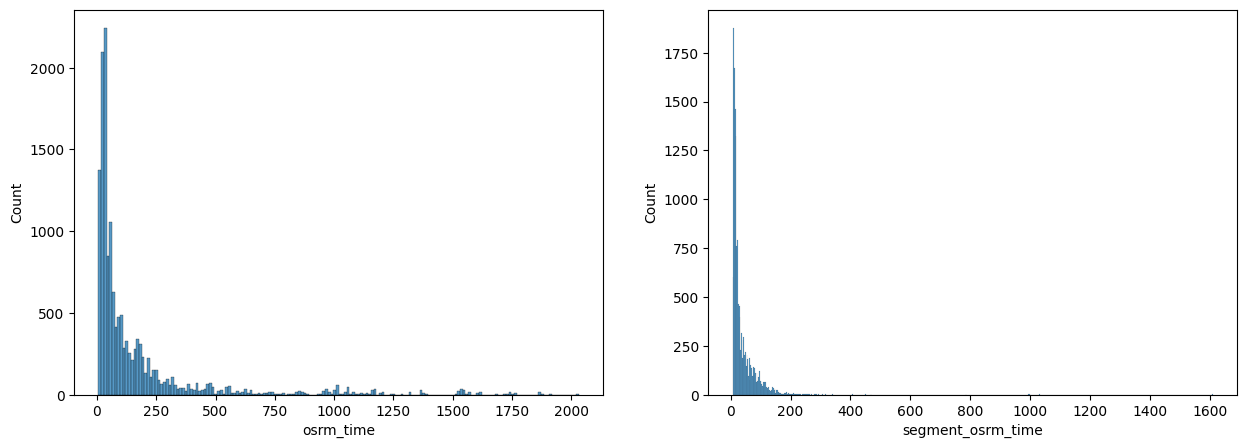

In [157]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['osrm_time'])

plt.subplot(1,2,2)

sns.histplot(df['segment_osrm_time'])
plt.show()

In [158]:
# H0 : The average osrm time is same as average segment osrm time
# Ha : The average osrm time is greater than average segment osrm time

alpha = 0.05

In [159]:
t_stat, p_val = stats.ttest_ind(df['osrm_time'], df['segment_osrm_time'], alternative="greater")
print(t_stat, p_val)

55.532976972827484 0.0


In [160]:
if p_val < alpha:
    print("Reject the Null Hypothesis. The average osrm time is greater than average segment osrm time.")
else:
    print("Fail to Reject the Null Hypothesis. The average osrm time is same as average segment osrm time.")

Reject the Null Hypothesis. The average osrm time is greater than average segment osrm time.


In [161]:
df[df['FTL'] == 1]

,trip_uuid,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday,test,training,carting,FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,...,Central,H_6,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1932.273969,3347.0,...,Bilaspur,HB,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,...,Dc,None,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
12,trip-153671117375890592,2018-09-12 00:12:53.759171,thanos::sroute:f7deffcd-f92a-409b-b86e-c477997...,IND415408AAC,Shirala_Central_DPP_3 (Maharashtra),IND415612AAA,Ratnagiri_MjgaonRd_D (Maharashtra),1038.0,219.424984,762.0,...,Central,DPP_3,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
13,trip-153671121411074590,2018-09-12 00:13:34.111131,thanos::sroute:fd23d4f1-012f-4247-80e9-506d32e...,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),995.0,474.446597,809.0,...,Shamshbd,H,2018,September,12,Wednesday,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14793,trip-153861004148234782,2018-10-03 23:40:41.482736,thanos::sroute:c3f32324-610e-486a-831d-55d03eb...,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),428.0,168.396341,349.0,...,Dudhani,D,2018,October,3,Wednesday,1.0,0.0,0.0,1.0
14794,trip-153861007249500192,2018-10-03 23:41:12.495257,thanos::sroute:6b53909c-62c8-4c16-8ea1-c746855...,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),1017.0,194.552260,847.0,...,Bbganj,I,2018,October,3,Wednesday,1.0,0.0,0.0,1.0
14795,trip-153861014185597051,2018-10-03 23:42:21.856227,thanos::sroute:fb308c0f-ea3a-48ef-a6c3-4776341...,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2180.0,836.072017,1674.0,...,MhraChng,D,2018,October,3,Wednesday,1.0,0.0,0.0,1.0
14797,trip-153861023893369544,2018-10-03 23:43:58.933947,thanos::sroute:58222da8-2ddc-46cd-be17-0ebd837...,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),256.0,84.743813,187.0,...,KaranNGR,D,2018,October,3,Wednesday,1.0,0.0,0.0,1.0


In [162]:
df['FTL'].value_counts()

FTL
0.0    8908
1.0    5909
Name: count, dtype: int64

[]

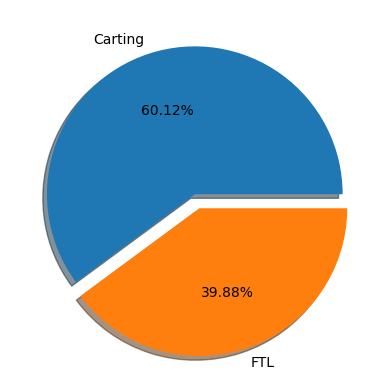

In [163]:
plt.pie(data=df, x=df['FTL'].value_counts() ,shadow=True,labels=['Carting','FTL'],explode=(0,0.1),autopct='%0.2f%%')
plt.plot()

[]

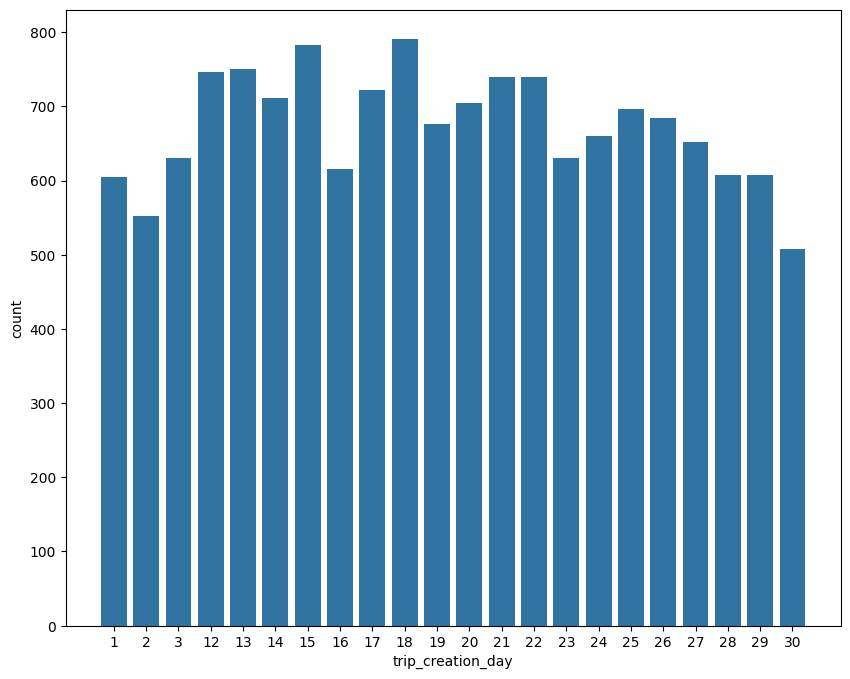

In [164]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['trip_creation_day'])
plt.plot()

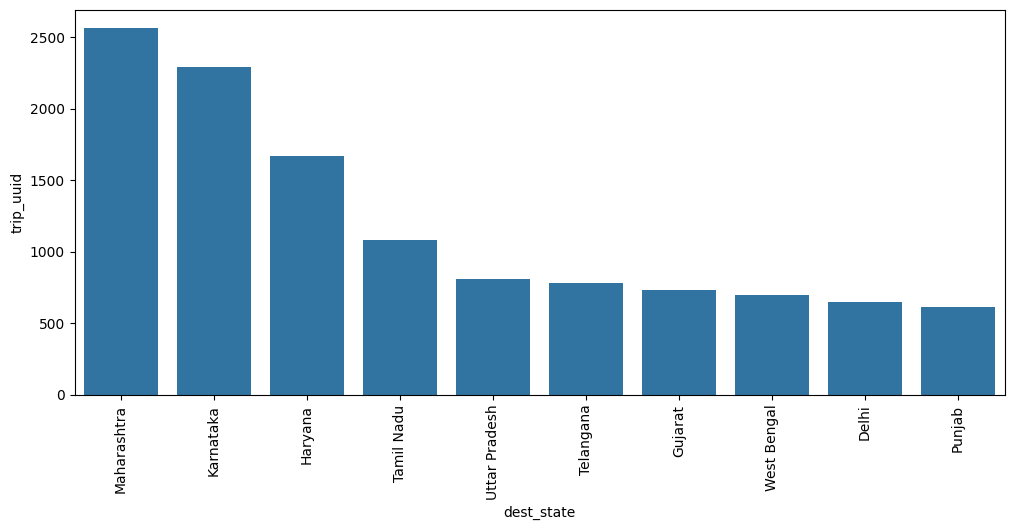

In [165]:
top_dest_states = df.groupby(by = 'dest_state', as_index=False).agg({'dest_state':'first', 'trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_dest_states, x='dest_state', y='trip_uuid')
plt.xticks(rotation=90)
plt.show()

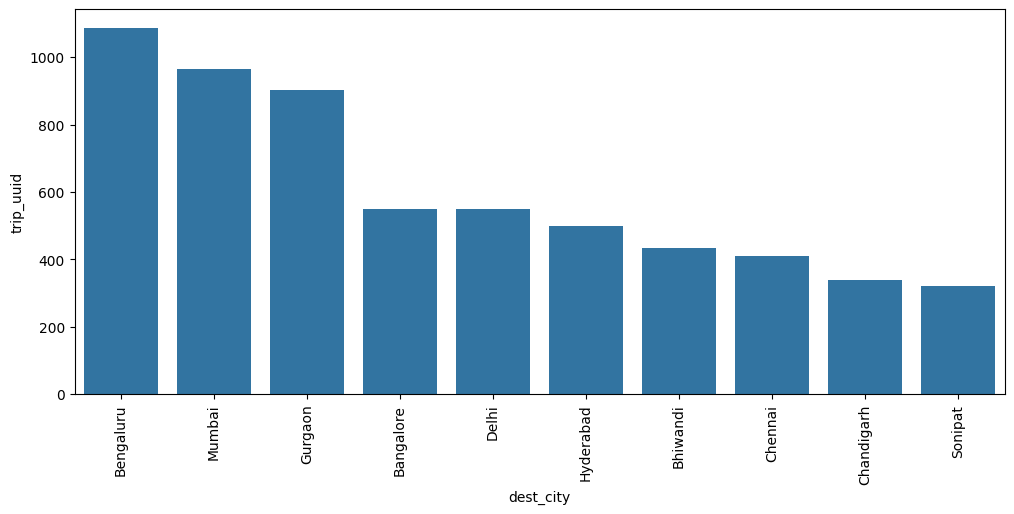

In [166]:
top_dest_city = df.groupby(by = 'dest_city', as_index=False).agg({'dest_city':'first', 'trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_dest_city, x='dest_city', y='trip_uuid')
plt.xticks(rotation=90)
plt.show()

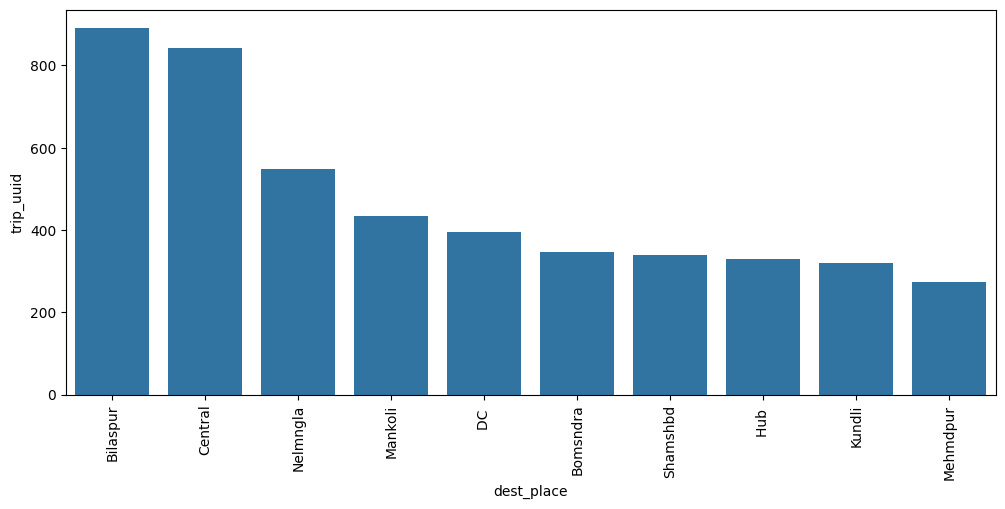

In [167]:
top_dest_places = df.groupby(by = 'dest_place', as_index=False).agg({'dest_place':'first', 'trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_dest_places, x='dest_place', y='trip_uuid')
plt.xticks(rotation=90)
plt.show()

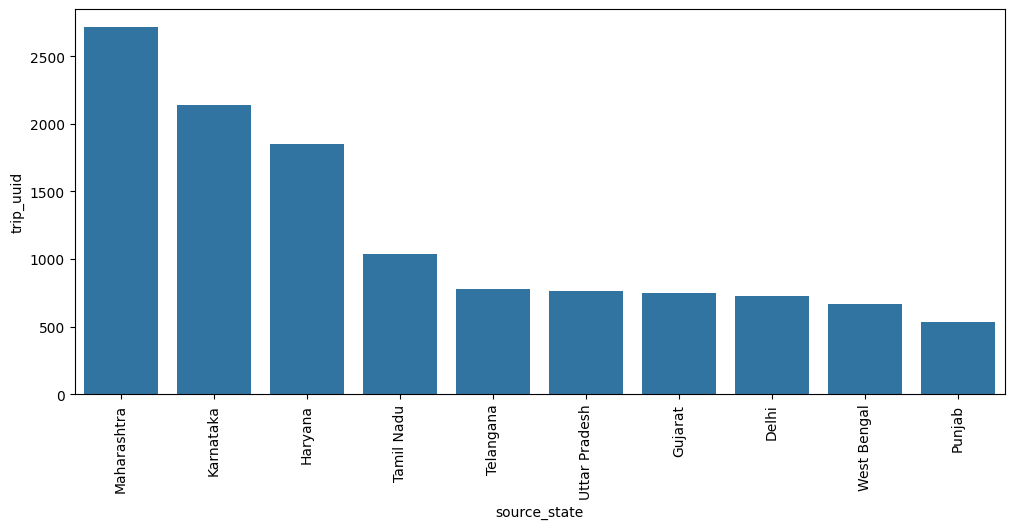

In [168]:
top_source_states = df.groupby(by = 'source_state', as_index=False).agg({'source_state':'first', 'trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_source_states, x='source_state', y='trip_uuid')
plt.xticks(rotation=90)
plt.show()

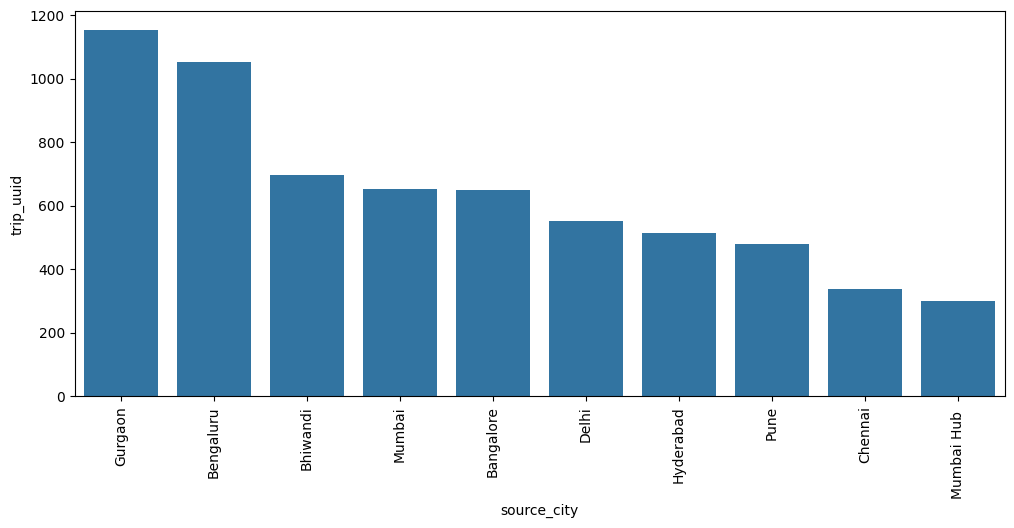

In [169]:
top_source_city = df.groupby(by = 'source_city', as_index=False).agg({'source_city':'first', 'trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_source_city, x='source_city', y='trip_uuid')
plt.xticks(rotation=90)
plt.show()

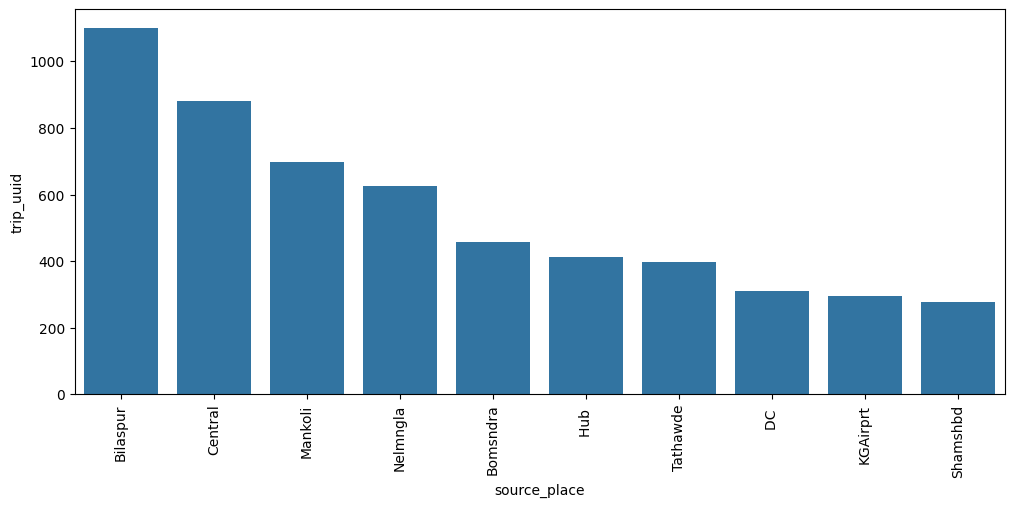

In [170]:
top_source_places = df.groupby(by = 'source_place', as_index=False).agg({'source_place':'first', 'trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_source_places, x='source_place', y='trip_uuid')
plt.xticks(rotation=90)
plt.show()

In [171]:
top_source_state_places = df.groupby(by = ['source_state','source_place'], as_index=False).agg({'source_state':'first', 'source_place':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_source_state_places

,source_state,source_place,trip_uuid
178,Haryana,Bilaspur,1101
398,Maharashtra,Mankoli,697
268,Karnataka,Nelmngla,625
237,Karnataka,Bomsndra,457
433,Maharashtra,Tathawde,396
254,Karnataka,KGAirprt,295
615,Telangana,Shamshbd,278
720,West Bengal,Dankuni,245
104,Delhi,Airport,237
631,Uttar Pradesh,Central,234


In [172]:
top_source_state_city = df.groupby(by = ['source_state','source_city'], as_index=False).agg({'source_state':'first', 'source_city':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_source_state_city

,source_state,source_city,trip_uuid
169,Haryana,Gurgaon,1155
228,Karnataka,Bengaluru,1052
349,Maharashtra,Bhiwandi,697
378,Maharashtra,Mumbai,654
224,Karnataka,Bangalore,648
104,Delhi,Delhi,551
566,Telangana,Hyderabad,515
390,Maharashtra,Pune,480
508,Tamil Nadu,Chennai,338
380,Maharashtra,Mumbai Hub,300


In [173]:
top_dest_state_places = df.groupby(by = ['dest_state','dest_place'], as_index=False).agg({'dest_state':'first', 'dest_place':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_dest_state_places

,dest_state,dest_place,trip_uuid
200,Haryana,Bilaspur,891
297,Karnataka,Nelmngla,548
438,Maharashtra,Mankoli,434
262,Karnataka,Bomsndra,346
686,Telangana,Shamshbd,339
209,Haryana,Kundli,320
515,Punjab,Mehmdpur,274
280,Karnataka,KGAirprt,272
467,Maharashtra,Tathawde,258
813,West Bengal,Dankuni,235


In [174]:
top_dest_state_city = df.groupby(by = ['dest_state','dest_city'], as_index=False).agg({'dest_state':'first', 'dest_city':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_dest_state_city

,dest_state,dest_city,trip_uuid
262,Karnataka,Bengaluru,1088
435,Maharashtra,Mumbai,966
203,Haryana,Gurgaon,904
257,Karnataka,Bangalore,551
135,Delhi,Delhi,549
664,Telangana,Hyderabad,499
406,Maharashtra,Bhiwandi,434
597,Tamil Nadu,Chennai,410
218,Haryana,Sonipat,322
450,Maharashtra,Pune,313


In [175]:
top_dest_city_source_city = df.groupby(by = ['dest_city','source_city'], as_index=False).agg({'dest_city':'first', 'source_city':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_dest_city_source_city

,dest_city,source_city,trip_uuid
228,Bengaluru,Bengaluru,581
227,Bengaluru,Bangalore,455
756,Hyderabad,Hyderabad,355
1205,Mumbai,Mumbai,339
1202,Mumbai,Bhiwandi,332
173,Bangalore,Bengaluru,328
471,Delhi,Gurgaon,241
1207,Mumbai,Mumbai Hub,227
395,Chennai,Chennai,223
276,Bhiwandi,Mumbai,207


In [176]:
top_dest_state_source_state = df.groupby(by = ['dest_state','source_state'], as_index=False).agg({'dest_state':'first', 'source_state':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_dest_state_source_state

,dest_state,source_state,trip_uuid
89,Maharashtra,Maharashtra,2453
65,Karnataka,Karnataka,2056
117,Tamil Nadu,Tamil Nadu,1021
41,Haryana,Haryana,953
125,Telangana,Telangana,685
33,Gujarat,Gujarat,629
140,West Bengal,West Bengal,615
129,Uttar Pradesh,Uttar Pradesh,597
110,Rajasthan,Rajasthan,453
0,Andhra Pradesh,Andhra Pradesh,414


In [177]:
top_dest_place_source_place = df.groupby(by = ['dest_place','source_place'], as_index=False).agg({'dest_place':'first', 'source_place':'first','trip_uuid':'count'}).sort_values(by='trip_uuid', ascending=False).head(10)
top_dest_place_source_place

,dest_place,source_place,trip_uuid
297,Central,Central,322
786,KGAirprt,Nelmngla,151
181,Bilaspur,Bilaspur,127
785,KGAirprt,Bomsndra,121
468,DC,DC,120
1222,Nelmngla,KGAirprt,108
1044,Mankoli,Chndivli,99
248,Bomsndra,Nelmngla,97
138,Bbganj,Bbganj,96
949,Kundli,Bilaspur,92


<Axes: xlabel='trip_creation_month', ylabel='count'>

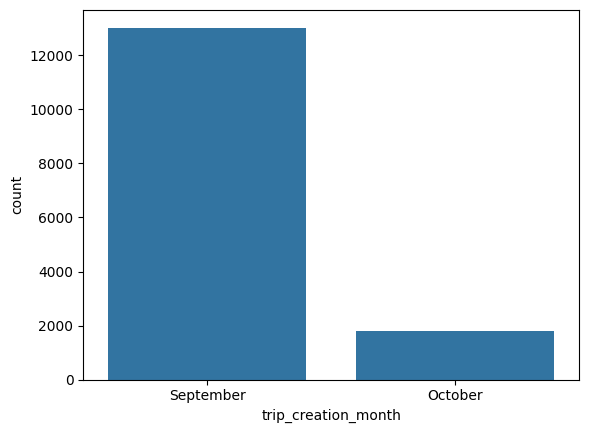

In [178]:
sns.countplot(data = df, x = 'trip_creation_month')

<Axes: xlabel='source_state'>

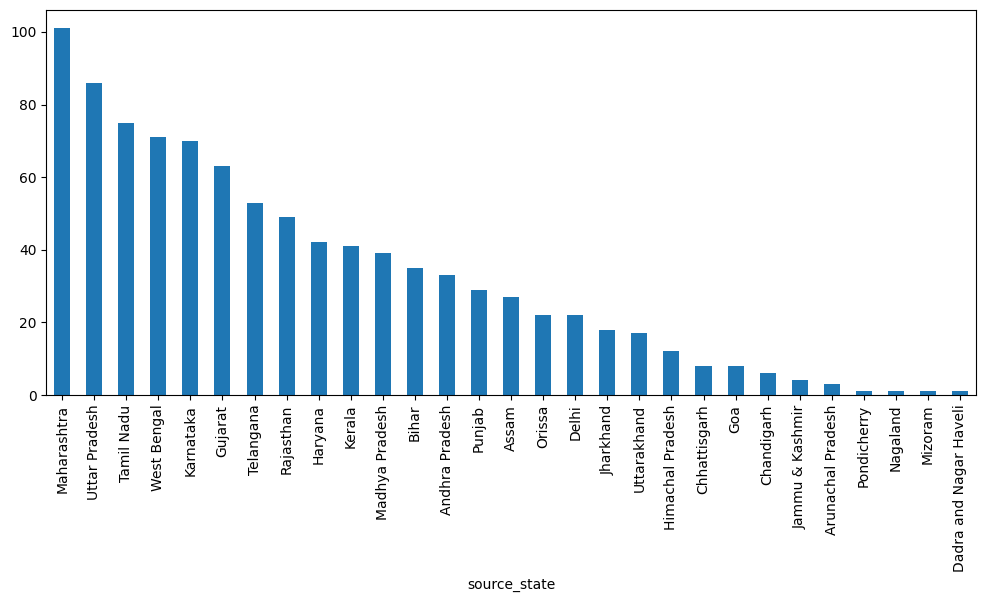

In [179]:
plt.figure(figsize=(12,5))
df.groupby('source_state')['source_center'].nunique().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='dest_state'>

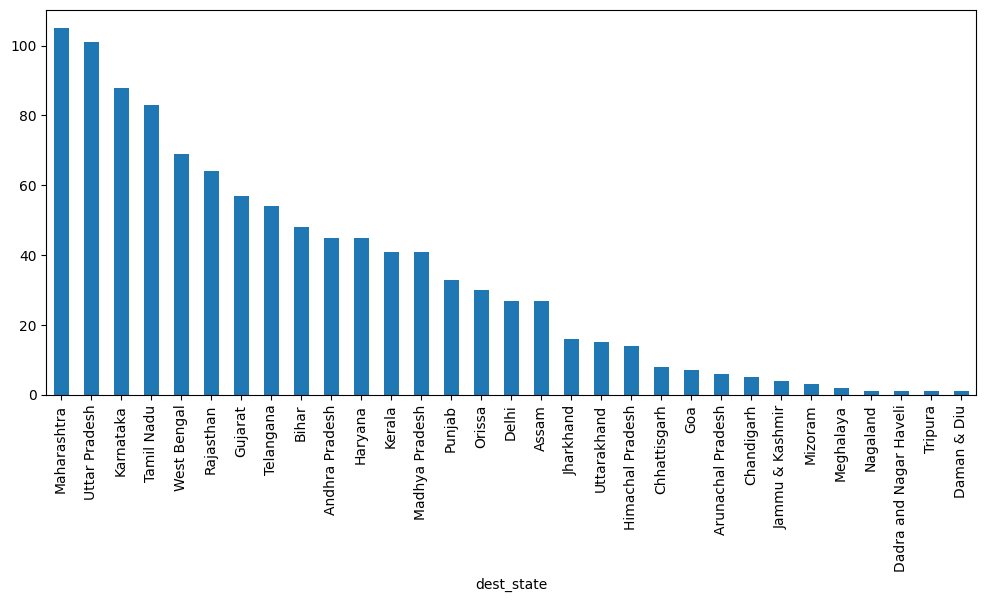

In [180]:
plt.figure(figsize=(12,5))
df.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False).plot(kind='bar')

<Axes: >

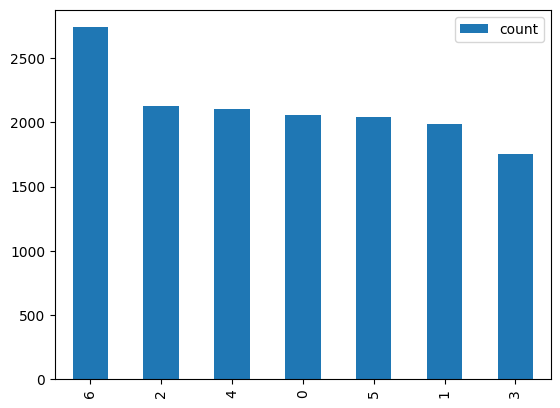

In [181]:
df.groupby('weekday')['trip_uuid'].nunique().to_frame('count').reset_index().sort_values(by='count', ascending=False).plot(kind='bar')

In [182]:
x1=df.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1

,source_state,variable,value
0,Andhra Pradesh,actual_time,398.435484
1,Arunachal Pradesh,actual_time,429.250000
2,Assam,actual_time,540.171642
3,Bihar,actual_time,492.645714
4,Chandigarh,actual_time,168.741935
5,Chhattisgarh,actual_time,174.139535
6,Dadra and Nagar Haveli,actual_time,48.333333
7,Delhi,actual_time,230.550824
8,Goa,actual_time,540.138462
9,Gujarat,actual_time,331.470667


In [183]:
x2=df.groupby('dest_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x2=pd.melt(x2, id_vars=['dest_state'], value_vars=['actual_time', 'osrm_time'])
x2

,dest_state,variable,value
0,Andhra Pradesh,actual_time,425.384615
1,Arunachal Pradesh,actual_time,334.360000
2,Assam,actual_time,453.896552
3,Bihar,actual_time,535.260274
4,Chandigarh,actual_time,164.984615
...,...,...,...
57,Telangana,osrm_time,174.216837
58,Tripura,osrm_time,204.000000
59,Uttar Pradesh,osrm_time,170.963009
60,Uttarakhand,osrm_time,207.540984


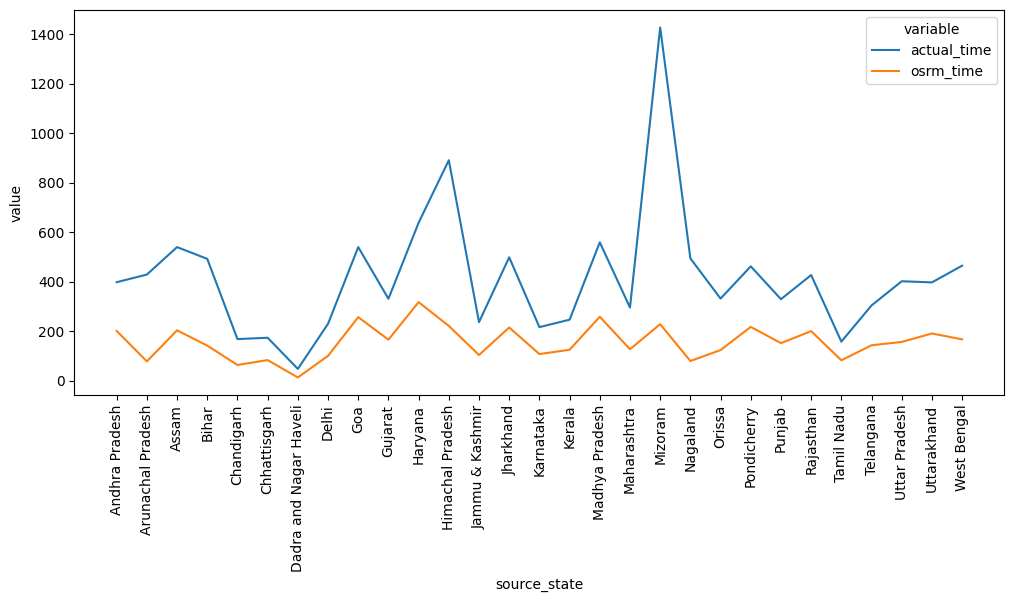

In [184]:
plt.figure(figsize=(12,5))
sns.lineplot(data=x1,x='source_state', y = 'value', hue='variable')
plt.xticks(rotation=90)
plt.show()

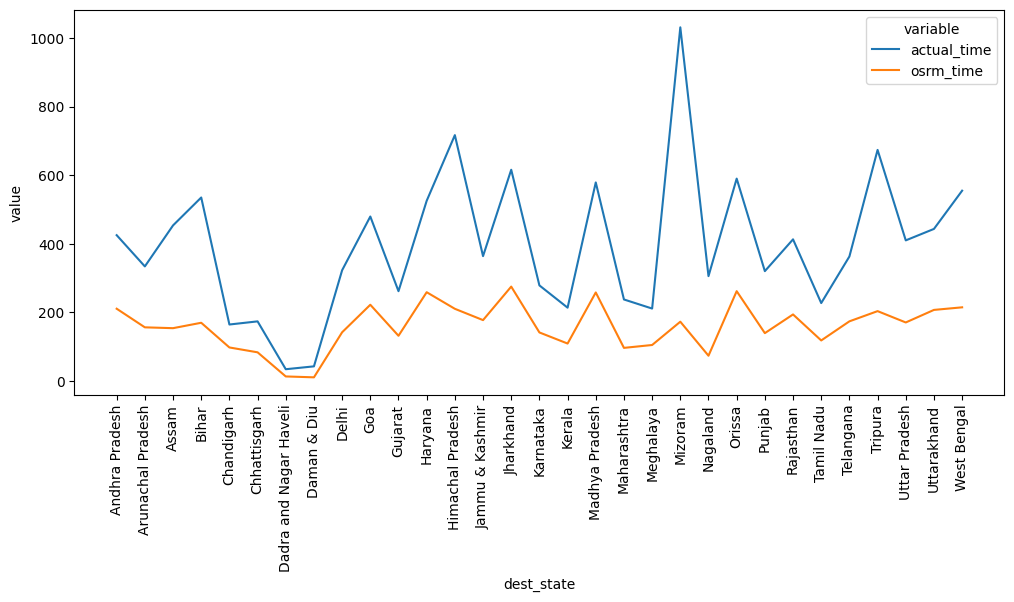

In [185]:
plt.figure(figsize=(12,5))
sns.lineplot(data=x2,x='dest_state', y = 'value', hue='variable')
plt.xticks(rotation=90)
plt.show()

In [186]:
for col in num_cols:
    test_stat, p_val = stats.shapiro(df[col])
    print(f'{col} -> {p_val}')

start_scan_to_end_scan -> 1.0720738529997654e-97
actual_distance_to_destination -> 2.4292500801526765e-107
actual_time -> 1.6650167910314194e-103
osrm_time -> 1.6189509335084781e-105
osrm_distance -> 8.01974733082887e-107
segment_actual_time -> 6.338785765281733e-111
segment_osrm_time -> 1.0421497387885946e-102
segment_osrm_distance -> 2.6217729258055972e-105
od_time_diff_hour -> 4.81522456715077e-78


c:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [187]:
min_max_scaler = MinMaxScaler()

for col in num_cols:
    df[col] = min_max_scaler.fit_transform(df[[col]])